# KMeans - Iris Dataset

In [1]:
import random

seed = 13
max_parallel_jobs = 10
random.seed(seed)

## Carregamento do dataset

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()

# Características 2:4 são as usadas no vídeo sobre o tema
X, y = dataset.data[:, 2:4], dataset.target

## Visualização 2D das features selecionadas

Text(0, 0.5, 'Petal width')

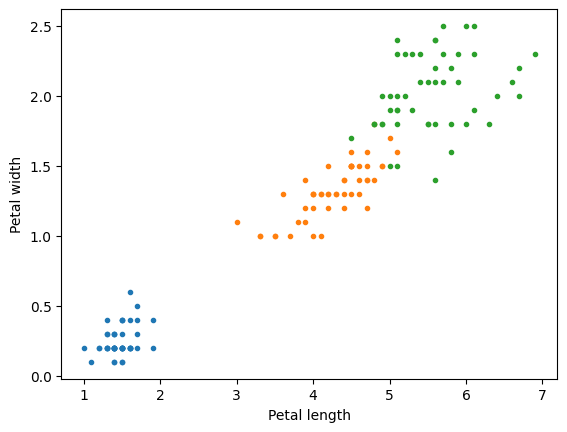

In [3]:
from matplotlib import pyplot

n_distinct_y = len(set(y))

for i in range(n_distinct_y):
    target_name = dataset.target_names[i]
    pyplot.plot(X[y == i, 0], X[y == i, 1], '.', label=target_name)
pyplot.xlabel('Petal length')
pyplot.ylabel('Petal width')

## Identificar número correto de clusters

Para identificar o número correto de clusters, uma das técnicas usadas é a análise de silhueta, que entrega valores entre -1 e 1. Essa análise se baseia em:

* Observar a altura de cada compartimento (quanto mais semelhante, mais uniforme a distribuição dos clusters)
* Observar o valor de coeficiente de silhueta, valores abaixo da média indicam possível escolha incorreta de cluster

Fonte: [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

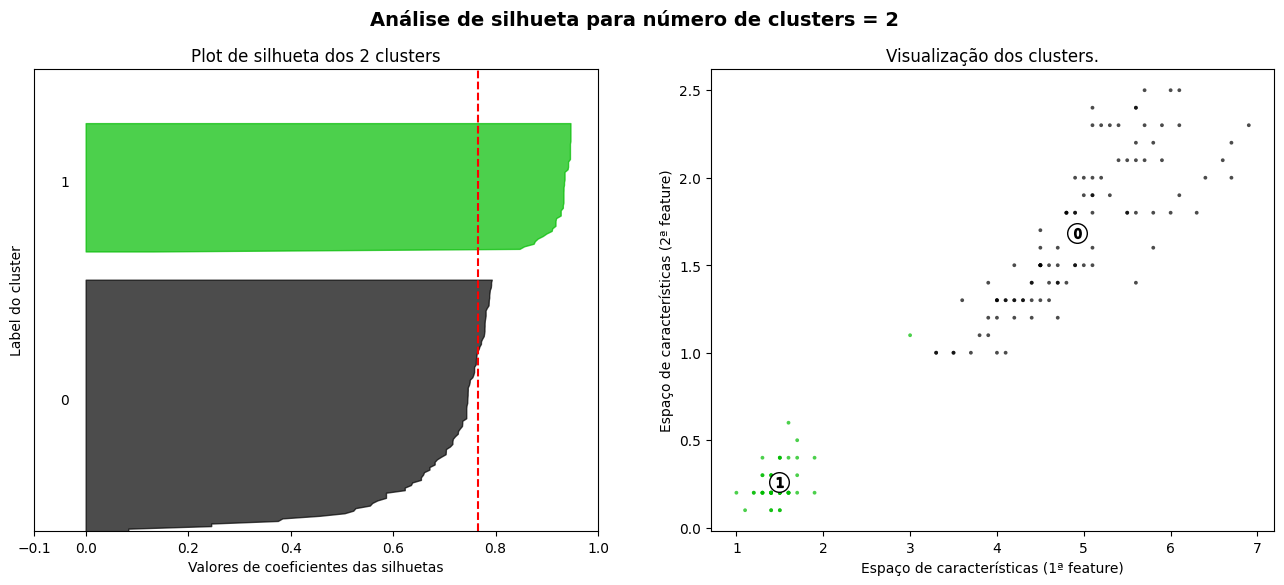

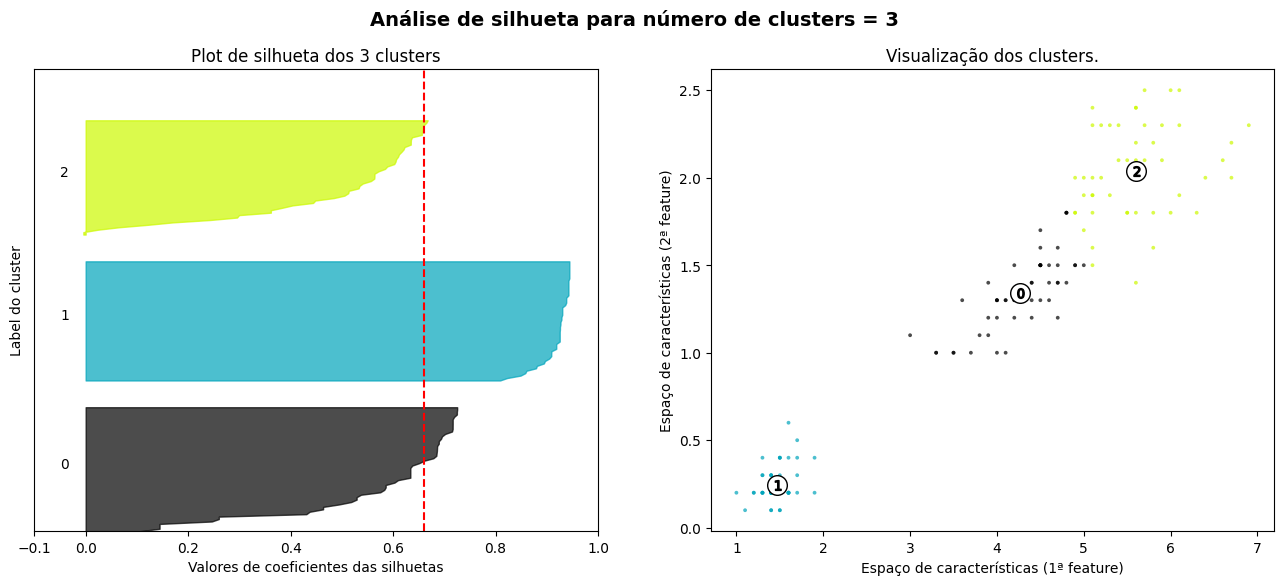

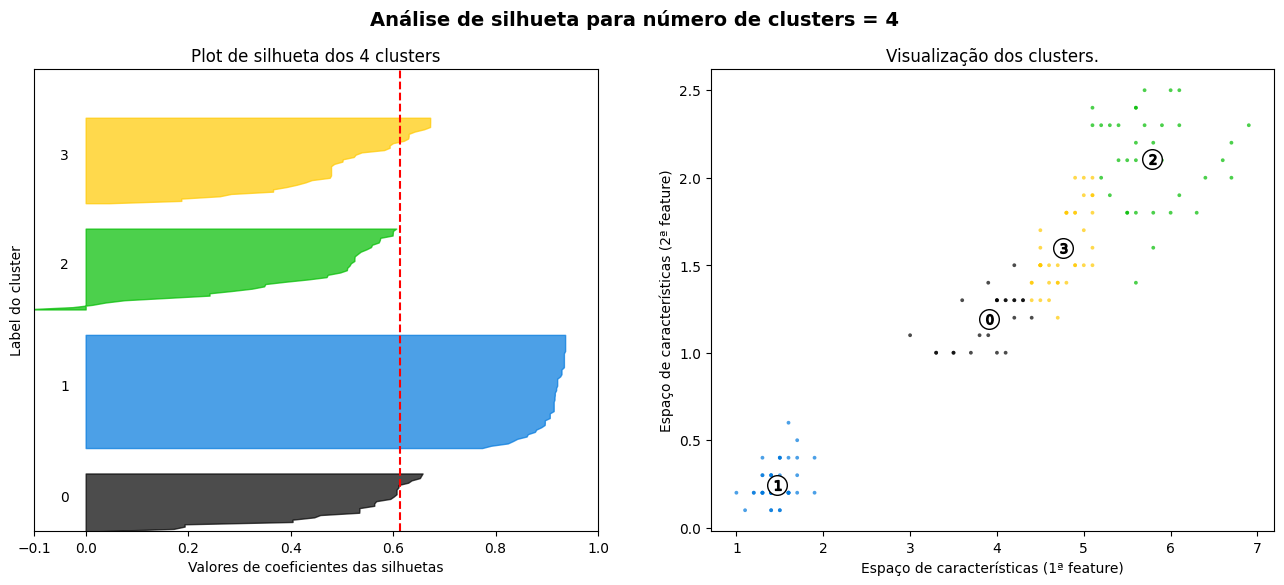

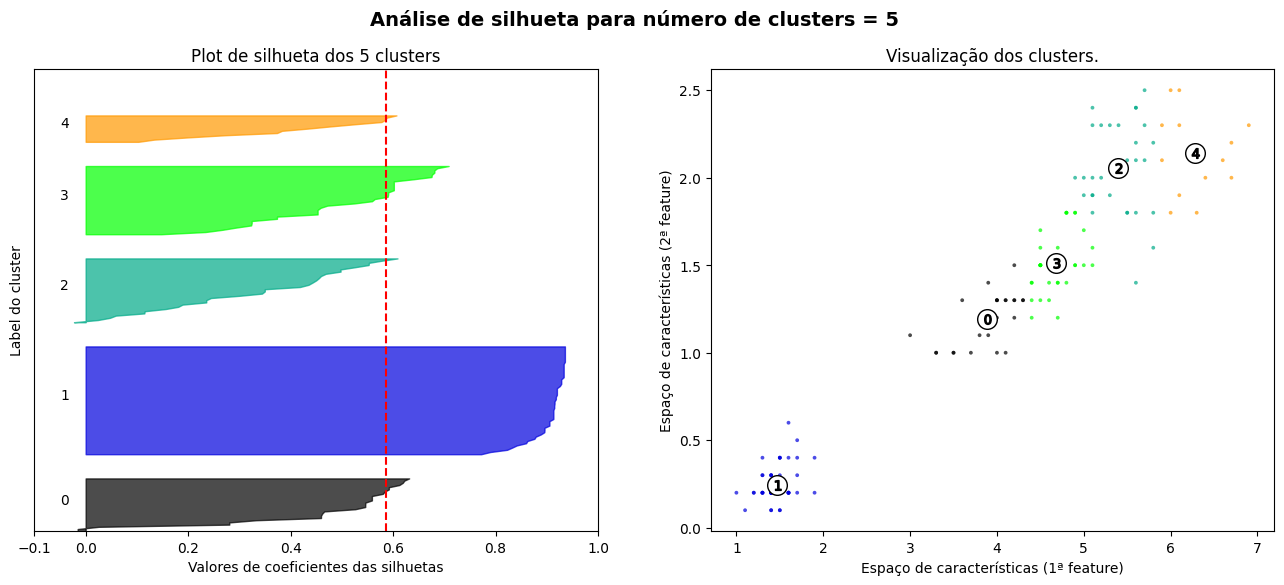

In [4]:
from numpy import ndarray
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def plot_silhouette_chart(axis: Axes, n_clusters: int, silhouette_avg: float, silhouette_values: ndarray):
    axis.set_xlim([-0.1, 1])
    axis.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 0

    for center_i in range(n_clusters):
        ith_cluster_silhouette_values: ndarray = silhouette_values[cluster_labels == center_i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(center_i) / n_clusters)
        axis.fill_betweenx(
            np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7,
        )
        axis.text(-0.05, y_lower + 0.5 * size_cluster_i, str(center_i))
        y_lower = y_upper + 10

    axis.set_title(f"Plot de silhueta dos {n_clusters} clusters")
    axis.set_xlabel("Valores de coeficientes das silhuetas")
    axis.set_ylabel("Label do cluster")
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")
    axis.set_yticks([])
    axis.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


def plot_cluster_points(axis: Axes, cluster_centers):
    colors = cm.nipy_spectral(cluster_labels.astype(float) / len(cluster_centers))
    axis.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    axis.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], marker="o", c="white",
        alpha=1, s=200, edgecolor="k",
    )
    for center_i, (center_x, center_y) in enumerate(cluster_centers):
        axis.scatter(center_x, center_y, marker=f"${center_i}$", alpha=1, s=50, edgecolor="k")

    axis.set_title("Visualização dos clusters.")
    axis.set_xlabel("Espaço de características (1ª feature)")
    axis.set_ylabel("Espaço de características (2ª feature)")


def plot_charts(silhouette_avg: float, silhouette_values: ndarray):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 6)
    plot_silhouette_chart(ax1, n_clusters, silhouette_avg, silhouette_values)
    plot_cluster_points(ax2, kmeans.cluster_centers_)
    plt.suptitle(f"Análise de silhueta para número de clusters = {n_clusters}", fontsize=14, fontweight="bold")


range_n_clusters = list(range(2, 6))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_values = silhouette_samples(X, cluster_labels)
    plot_charts(silhouette_avg, silhouette_values)

plt.show()

Após observar a altura dos clusters, notamos que a opção com 3 clusters apresentar a maior semelhança entre a altura dos clusters e valores acima da média.

## Resultados

In [5]:
from sklearn.cluster import KMeans

kmeans_params = {'algorithm': 'lloyd', 'init': 'k-means++', 'n_init': 6}
kmeans = KMeans(**kmeans_params, n_clusters=3, random_state=seed)

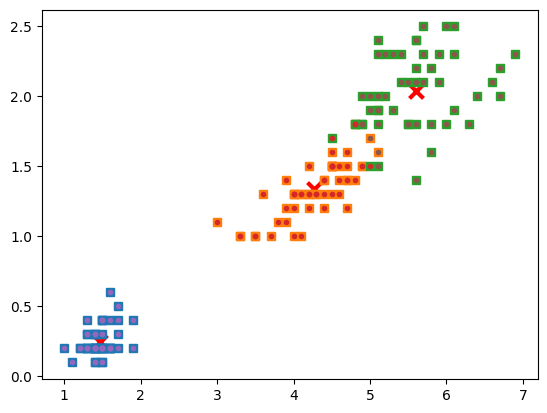

In [7]:
labels = dataset.target_names

for i in range(n_distinct_y):
    plt.plot(X[y == i, 0], X[y == i, 1], 's', label=labels[i])

kmeans.fit(X)
predict = kmeans.predict(X)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='r', s=100, linewidths=3)

for i in range(n_distinct_y):
    plt.plot(X[predict == i, 0], X[predict == i, 1], '.', label=labels[i])

plt.show()